# Demo - Kubernetes Service Deployment

## Building the container images

#### Use `docker login` to setup your credentials

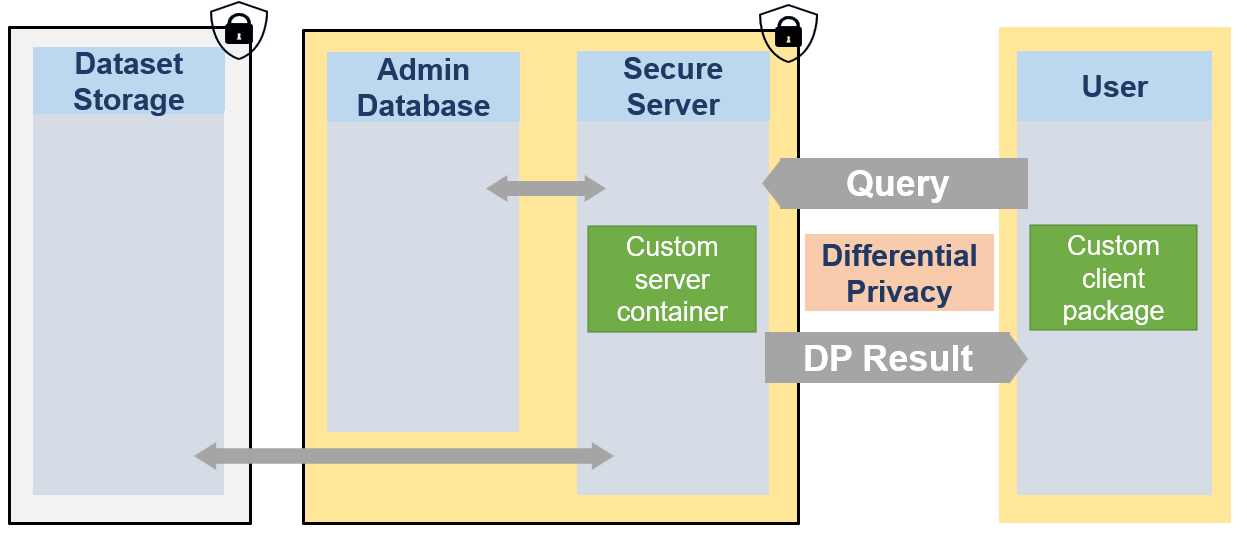

In [1]:
from IPython.display import Image
Image(filename="images/image_demo_deployment_containers.png", width=800)

### Server

In [ ]:
!cd .. && docker build --target lomas_server -t <your_registry>/lomas_server:latest .
!cd .. && docker push <your_registry>/lomas_server:latest

### Client

In [ ]:
!cd ../../client/ && docker build --target lomas_client -t <your_registry>/lomas_client:latest .
!cd ../../client/ && docker push <your_registry>/lomas_client:latest

## Starting the service

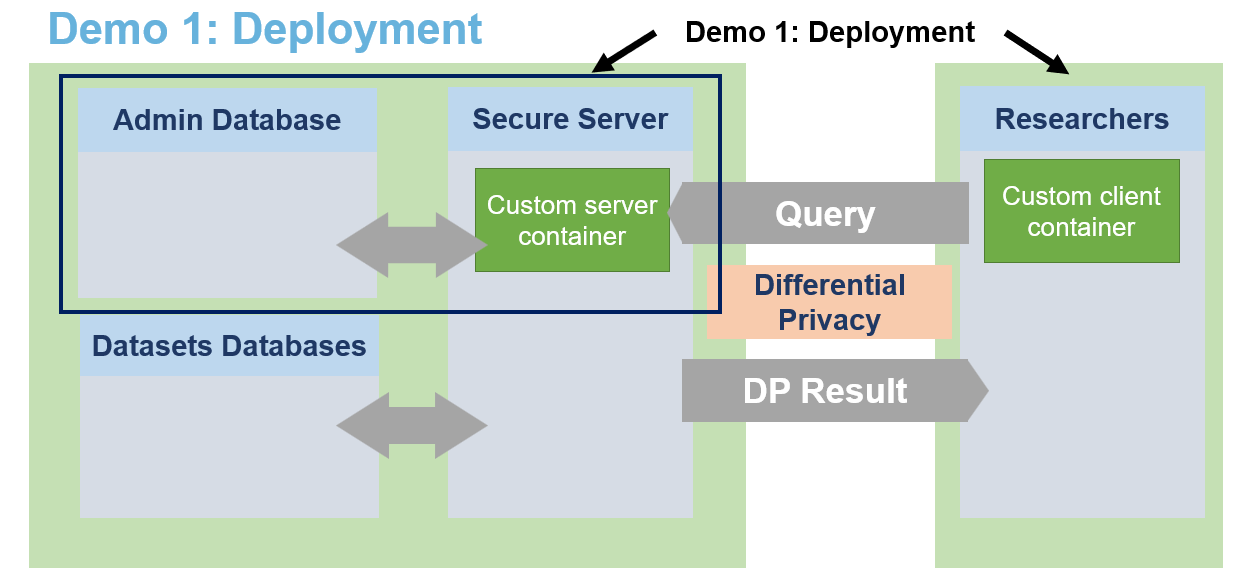

In [2]:
from IPython.display import Image
Image(filename="images/image_demo_deployment_service.png", width=800)

In [3]:
import os
os.chdir('../deploy/helm/charts/lomas_server')


#### Update `values.yaml` file

#### Download Helm dependency for the MongoDB chart

In [2]:
!helm dependency update

Saving 1 charts
Pulled: registry-1.docker.io/bitnamicharts/mongodb:13.18.1
Digest: sha256:f3b2a691537260044746bc4a8898e9ae68e8c29864639737b6da920f99aebe97
Deleting outdated charts


#### Install server chart

In [3]:
!helm install -f values.yaml lomas-service .

W1212 08:38:59.187407  178308 warnings.go:70] annotation "kubernetes.io/ingress.class" is deprecated, please use 'spec.ingressClassName' instead
NAME: lomas-service
LAST DEPLOYED: Tue Dec 12 08:38:56 2023
NAMESPACE: user-aymond
STATUS: deployed
REVISION: 1
TEST SUITE: None
NOTES:
1. Get the application URL by running these commands:
  https://lomas-server.lab.sspcloud.fr/


#### Check deployment with `kubectl get all` and by querying `<server_url>/state`

## Starting the client session



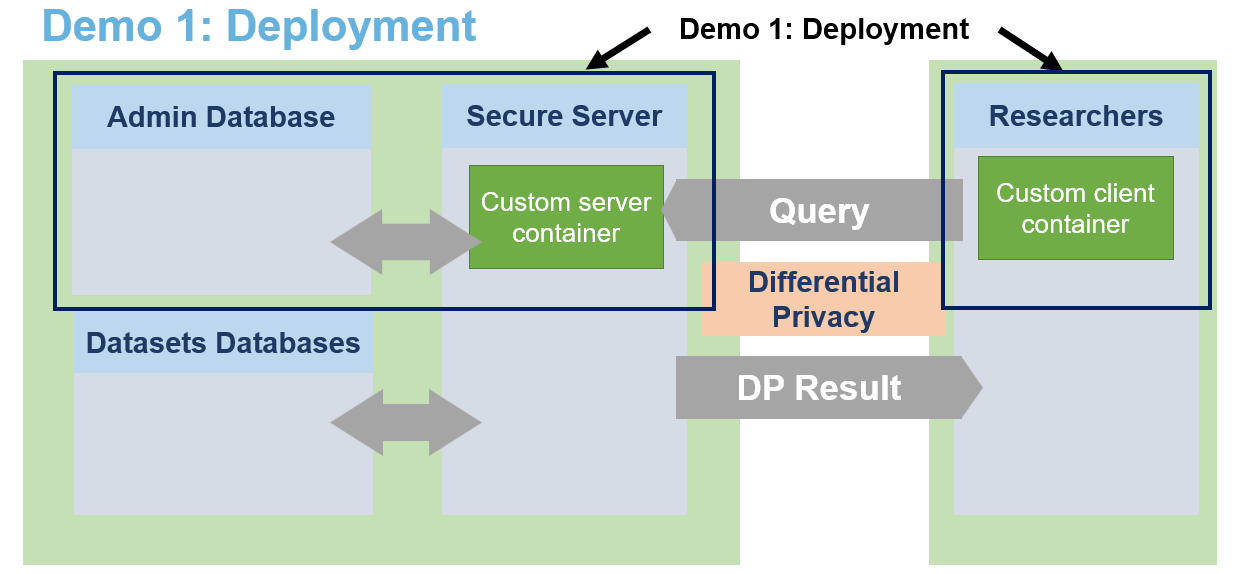

In [4]:
os.chdir("../../../../notebooks/")
from IPython.display import Image
Image(filename="images/image_demo_deployment_client.png", width=800)

In [5]:
os.chdir("../../client/deploy/helm/charts/lomas_client")

#### Update `values.yaml` file

#### Install the client chart

In [7]:
!helm install -f values.yaml lomas-client .

W1212 10:06:30.269176  189525 warnings.go:70] annotation "kubernetes.io/ingress.class" is deprecated, please use 'spec.ingressClassName' instead
NAME: lomas-client
LAST DEPLOYED: Tue Dec 12 10:06:28 2023
NAMESPACE: user-aymond
STATUS: deployed
REVISION: 1
TEST SUITE: None
NOTES:
1. Get the application URL by running these commands:
  https://lomas-client.lab.sspcloud.fr/


#### Access the client environment through the url and use the password defined in the values file.

## Stopping the service

In [ ]:
!helm uninstall lomas-service
!helm uninstall lomas-client